In [177]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.integrate as integrate
from scipy.integrate import quad 

In [199]:
raw_data = np.load('N784_bJ09.npy')

In [200]:
n = 784

In [201]:
counts, bins, _ = plt.hist(raw_data, bins=100, density=True)
plt.clf()

bin_centers = (bins[:-1] + bins[1:]) / 2
bin_width = bins[1] - bins[0]

prob_dist = counts

s = 0
for i in range(len(prob_dist)):
    s += prob_dist[i] * ((bins[i] + bins[i+1]) / 2) 
f = s / np.sum(prob_dist)

e = 0
for i in range(len(prob_dist)):
    e += prob_dist[i] * ((bins[i] + bins[i+1]) / 2)**2
secmom = e / np.sum(prob_dist)

chi = n * secmom

print(chi)
print(f)

43.246474516026844
0.21343051062436627


<Figure size 640x480 with 0 Axes>

In [202]:
def clt(x):
        return (2/secmom)*x*np.exp((-1/secmom)*(x**2))

In [203]:
#be = 1.37 # bJ = 0.01
be = 2.6323 # bJ = 0.9
delta = 2/chi - 1
w = 0.25*(delta + be - 0.5)

def pade_raw(x):
    return 2 * np.pi * x * ((1-x**2)**(n/2)) * np.exp(-n*(delta/2)*(x**2)) * np.exp(n*w*x**4)

def pade(x):
    return (1/integrate.quad(lambda x: pade_raw(x), 0, 1, full_output=1)[0])*pade_raw(x)

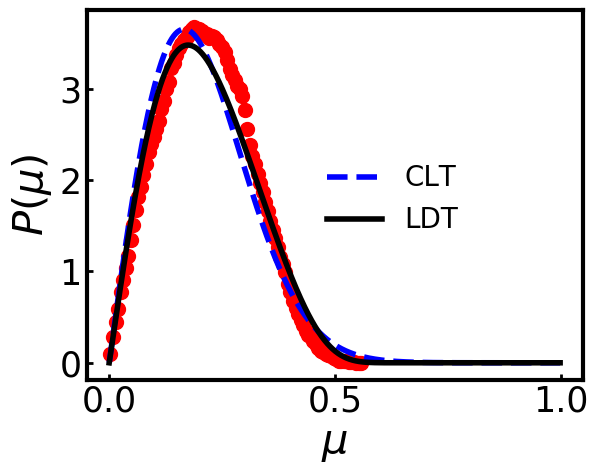

In [204]:
plt.plot(bin_centers, prob_dist, marker='o', markersize=10, linestyle='None', color='red')
z = np.arange(0,1,0.001)
plt.plot(z, clt(z), lw=4, color='blue', label='CLT', linestyle='dashed')
plt.plot(z, pade(z), lw=4, color='black', label='LDT')


ax = plt.gca()  # Get the current axes
line_width = 3
ax.spines['top'].set_linewidth(line_width)
ax.spines['bottom'].set_linewidth(line_width)
ax.spines['left'].set_linewidth(line_width)
ax.spines['right'].set_linewidth(line_width)
plt.xlabel(r'$\mu$', fontsize='30')
plt.ylabel(r'$P(\mu)$', fontsize='30')

# bJ = 0.01 parameters
#plt.ylim(0, 30)
#plt.xlim(0, 0.2)
#plt.xticks(ticks=[0, 0.1, 0.2], labels=['0', '0.1', '0.2'])
#plt.yticks(ticks=[0, 10, 20, 30])
#plt.text(0.04, 26, r'2D, $N=784, \beta J=0.01$', fontsize=25)
#plt.text(0.094, 19.5, '\u26AB\u26AB\u26AB', color='red', fontsize=20, va='center')
#plt.text(0.127, 19.5, 'Simulation', color='black', fontsize=20, va='center')

plt.legend(bbox_to_anchor=(0.8, 0.65), prop={'size': 20}, frameon=False)
plt.tick_params(labelsize=25)
plt.tick_params(which='major', length=4, width=2, direction='in')
#plt.savefig('./N784_bJ001_prob.jpeg', dpi=300, bbox_inches='tight')

/home/lefterman/.conda/envs/dev-py2/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/home/lefterman/.conda/envs/dev-py2/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


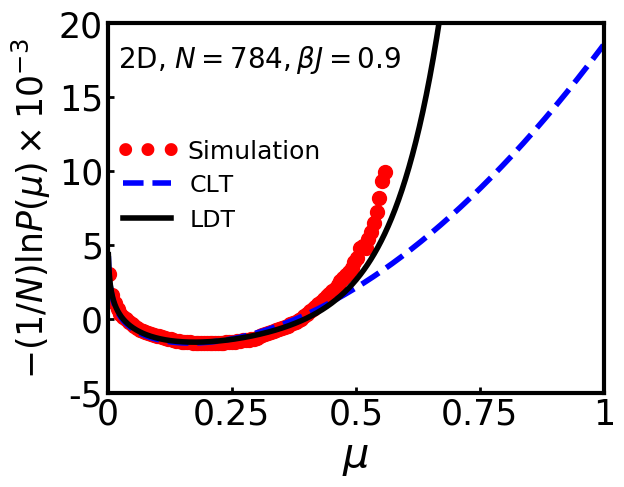

In [242]:
exactRate = -(1/N)*np.log(prob_dist)
def cltrate(x):
    return -(1/N)*np.log(clt(x))
def paderate(x):
    return -(1/N)*np.log(pade(x))


ax = plt.gca()  # Get the current axes
line_width = 3
ax.spines['top'].set_linewidth(line_width)
ax.spines['bottom'].set_linewidth(line_width)
ax.spines['left'].set_linewidth(line_width)
ax.spines['right'].set_linewidth(line_width)

plt.plot(bin_centers, exactRate, marker='o', markersize=10, linestyle='None', color='red')
plt.plot(z, cltrate(z), lw=4, color='blue', linestyle='dashed', label='CLT')
plt.plot(z, paderate(z), lw=4, color='black', label='LDT')

# bJ = 0.9
plt.xlim(0, 0.95)
plt.ylim(-0.0025, 0.015)
plt.xticks(ticks=[0, 0.25, 0.5, 0.75, 1], labels=['0', '0.25', '0.5', '0.75', '1'])
plt.yticks(ticks=[-0.005, 0, 0.005, 0.01, 0.015, 0.02], labels=['-5', '0', '5', '10', '15', '20'])
plt.text(0.02, 0.017, r'2D, $N=784, \beta J=0.9$', fontsize=20)
plt.text(0.011, 0.0113, '\u26AB\u26AB\u26AB', color='red', fontsize=20, va='center')
plt.text(0.16, 0.0113, 'Simulation', color='black', fontsize=18, va='center')
plt.legend(bbox_to_anchor=(0.3, 0.65), prop={'size': 17}, frameon=False)

# bJ = 0.01 parameters
#plt.ylim(-0.005, 0.02)
#plt.xlim(0, 0.17)
#plt.xticks(ticks=[0, 0.05, 0.1, 0.15], labels=['0', '0.05', '0.1', '0.15'])
#plt.yticks(ticks=[-0.005, 0, 0.005, 0.01, 0.015, 0.02], labels=['-5', '0', '5', '10', '15', '20'])
#plt.text(0.01, 0.017, r'2D, $N=784, \beta J=0.01$', fontsize=23)
#plt.text(0.011, 0.011, '\u26AB\u26AB\u26AB', color='red', fontsize=20, va='center')
#plt.text(0.04, 0.0113, 'Simulation', color='black', fontsize=20, va='center')
#plt.legend(bbox_to_anchor=(0.4, 0.65), prop={'size': 20}, frameon=False)

plt.xlabel(r'$\mu$', fontsize='30')
plt.ylabel(r'$-(1/N)\ln{P(\mu)} \times 10^{-3}$', fontsize='25')
plt.tick_params(labelsize=25)
plt.tick_params(which='major', length=4, width=2, direction='in')
plt.savefig('./N784_bJ09_rate.jpeg', dpi=300, bbox_inches='tight')

In [188]:
root = []
axis = []

delta = 2/chi - 1

print(f)
for a in range(26310, 26330, 1):

    be = a/10000
    
    axis.append(be)
    
    w = 0.25*(delta + be - 0.5)
    
    def Pade(x):
        return 2*np.pi* x * ((1-x**2)**(n/2)) * np.exp(-n*(delta/2)*(x**2)) * np.exp(n*w*x**4)

    r = integrate.quad(lambda x: Pade(x), 0, 1, full_output=1)[0]

    def Normed(x):
        return (1/r) * Pade(x)

    inte = integrate.quad(lambda x: x*Normed(x), 0, 1, full_output=1)[0]
    
    diff = abs(inte-f)
    root.append(diff)
    print('be:', be, '<Q>_num:', int, '<Q>_sim-<Q>_num:', diff) 

0.21343051062436627
be: 2.631 <Q>_num: nan <Q>_sim-<Q>_num: 0.00022054391603806844
be: 2.6311 <Q>_num: nan <Q>_sim-<Q>_num: 0.00020376315696316039
be: 2.6312 <Q>_num: nan <Q>_sim-<Q>_num: 0.0001869755086600089
be: 2.6313 <Q>_num: nan <Q>_sim-<Q>_num: 0.0001701809666057319
be: 2.6314 <Q>_num: nan <Q>_sim-<Q>_num: 0.00015337952627322848
be: 2.6315 <Q>_num: nan <Q>_sim-<Q>_num: 0.00013657118313231686
be: 2.6316 <Q>_num: nan <Q>_sim-<Q>_num: 0.00011975593264837436
be: 2.6317 <Q>_num: nan <Q>_sim-<Q>_num: 0.00010293377028350315
be: 2.6318 <Q>_num: nan <Q>_sim-<Q>_num: 8.610469149580857e-05
be: 2.6319 <Q>_num: nan <Q>_sim-<Q>_num: 6.926869173987105e-05
be: 2.632 <Q>_num: nan <Q>_sim-<Q>_num: 5.242576646602437e-05
be: 2.6321 <Q>_num: nan <Q>_sim-<Q>_num: 3.5575911121465964e-05
be: 2.6322 <Q>_num: nan <Q>_sim-<Q>_num: 1.8719121149007867e-05
be: 2.6323 <Q>_num: nan <Q>_sim-<Q>_num: 1.8553919882147163e-06
be: 2.6324 <Q>_num: nan <Q>_sim-<Q>_num: 1.5015280925539942e-05
be: 2.6325 <Q>_num: nan <Q>